# Soil Models

*Martin Vonk (2025)*

Soil Models are method to describe the relation between the pressure head, water content and the hydraulic conductivity. This notebooks shows two soil models present in the pedon library.

In [1]:
import matplotlib.pyplot as plt

import pedon as pe

Pedon does not assume units for most soil types but it is good convention to use cm as the length unit. Let's create two soil models, one using the Mualem-van Genuchten equation, and one using the Brooks-Corey Equation

In [2]:
# shared properties
k_s = 100  # saturated conductivity [cm/d]
theta_r = 0.03  # residual water content [-]
theta_s = 0.42  # saturated water content [-]

In [3]:
# Mualem-van Genuchten
alpha = 0.04  # shape parameter [1/cm]
n = 1.4  # shape parameter [-]

gen = pe.Genuchten(
    k_s=k_s,
    theta_r=theta_r,
    theta_s=theta_s,
    alpha=alpha,
    n=n,
)

In [4]:
# Brooks-Corey
h_b = 10  # bubbling pressure [cm]
# connectivity parameter [-]
l = 1.1  # noqa: E741

bro = pe.Brooks(
    k_s=k_s,
    theta_r=theta_r,
    theta_s=theta_s,
    h_b=h_b,
    l=l,
)

In [5]:
alpha = 1.611e6
beta = 3.96
a = 1.175e6
hav = pe.Haverkamp(
    k_s=k_s,
    theta_r=theta_r,
    theta_s=theta_s,
    alpha=alpha,
    beta=beta,
    a=a,
)

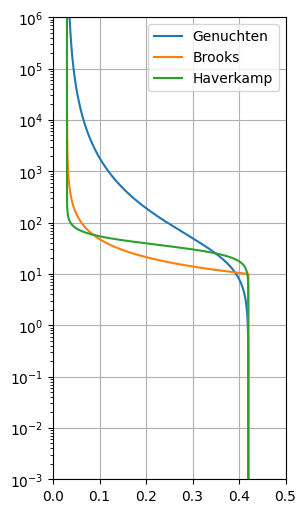

In [6]:
# Quick plot method
ax = gen.plot()
bro.plot(ax=ax)
hav.plot(ax=ax)
ax.set_xlim(0.0, 0.5)
ax.legend();

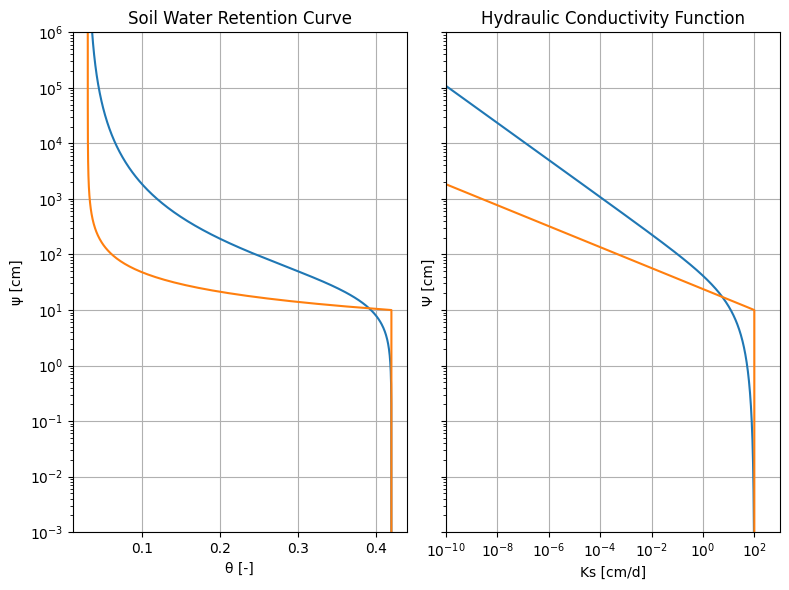

In [7]:
# More extensive plot method
f, axs = plt.subplots(1, 2, figsize=(8, 6), sharey=True)

pe.plot_swrc(gen, ax=axs[0])
pe.plot_swrc(bro, ax=axs[0])
axs[0].set_yscale("log")
axs[0].set_ylabel("\N{GREEK SMALL LETTER PSI} [cm]")
axs[0].set_title("Soil Water Retention Curve")
axs[0].set_xlabel("\N{GREEK SMALL LETTER THETA} [-]")

pe.plot_hcf(gen, ax=axs[1])
pe.plot_hcf(bro, ax=axs[1])
axs[1].set_yscale("log")
axs[1].set_ylabel("\N{GREEK CAPITAL LETTER PSI} [cm]")
axs[1].set_title("Hydraulic Conductivity Function")
axs[1].set_xlabel("Ks [cm/d]")
axs[1].set_xscale("log")
axs[1].set_xlim(1e-10, 1e3)

f.tight_layout()

Other soil models that are available are Panday (combination of Genuchten and Brooks-Corey), Fredlund and Gardner. 